In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame
import tensorflow as tf
plt.rcParams["figure.figsize"] = (12,8)

In [2]:
sigmoid = lambda x: 1/(1 + np.exp(-x))

In [3]:
def plot_model(model, feature_labmda, title):
    from pandas import DataFrame
    xx, yy = np.meshgrid(np.linspace(-1.5,1.5, 200), np.linspace(-1.5,1.5, 200))
    inputs_xy = np.array([feature_labmda(xxval, yyval) for xxval, yyval in zip(xx.flatten(), yy.flatten())])
    prediction = model(inputs_xy)
    prediction_np = prediction.numpy()
    Z = prediction_np.reshape(xx.shape)
    df = DataFrame(dict(x=xy[:,0], y=xy[:,1], label=labels.flatten()))
    colors = {0:'red', 1:'blue'}
    markers = {0:'bs', 1:'r^'}
    _, ax = plt.subplots(figsize=(10, 10))
    ax.contourf(xx, yy, Z, 5, cmap=plt.cm.jet, alpha=.8)
    cs = ax.contour(xx, yy, Z, cmap=plt.cm.jet, levels=[0, 0.5], linestyles='--', linewidths=3)
    ax.clabel(cs, colors='k')
    grouped = df.groupby('label')
    for k, xy0 in df[['x', 'y']].iterrows():
        x0, y0 = xy0.values
        plt.plot(x0, y0, markers[labels[k][0]], mec='k', alpha=0.6)
    ax.set_xlim([-1.3, 1.3])
    ax.set_ylim([-1.3, 1.3])
    plt.grid()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(title)
    plt.show()

In [4]:
def generate_batches(batch_size, features, labels):
    outout_batches = []
    sample_size = len(features)
    for start_i in range(0, sample_size, batch_size):
        end_i = start_i + batch_size
        batch = [features[start_i:end_i], labels[start_i:end_i]]
        outout_batches.append(batch)
    return outout_batches

# CheckerBoard

다음 데이터를 잘 분류하는 이항 분류 모델을 찾으시오.

In [5]:
np.random.seed(410)
xy = np.random.uniform(-1,1, (200,2))
labels = np.zeros((200), dtype=np.int32)
labels[xy[:,0] * xy[:,1] > 0] = 1

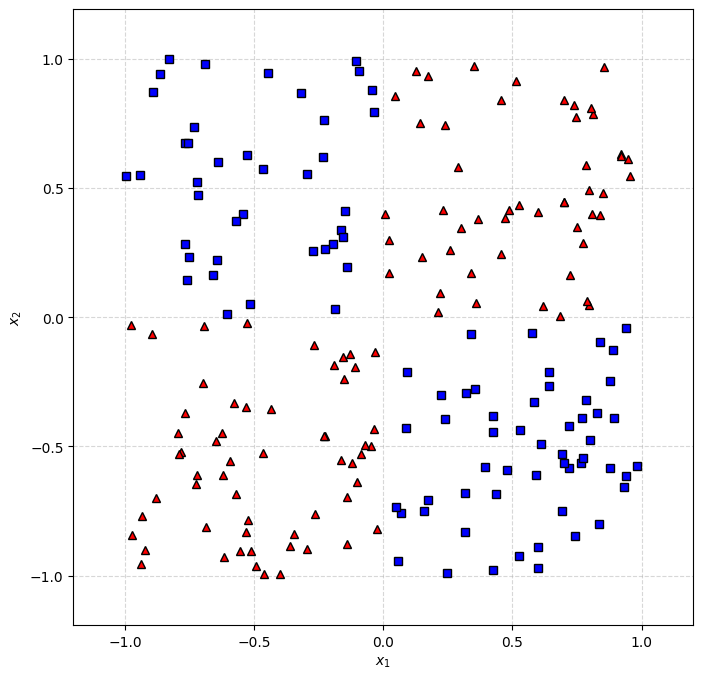

In [6]:
df = DataFrame(dict(x=xy[:,0], y=xy[:,1], label=labels.flatten()))
colors = {0:'red', 1:'blue'}
_, ax = plt.subplots(figsize=(8, 8))
grouped = df.groupby('label')
markers = {0:'bs', 1:'r^'}
for k, xy0 in df[['x', 'y']].iterrows():
    x0, y0 = xy0.values
    plt.plot(x0, y0, markers[labels[k]], mec='k')
plt.axis('equal')
plt.grid(linestyle='--', alpha=0.5)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
ax.set_xlim([-1.2, 1.2])
ax.set_ylim([-1.2, 1.2])
plt.show()

In [7]:
labels = labels.reshape(200,1)

In [8]:
features = np.array([[xval*yval] for xval, yval in xy])

In [9]:
class MyModel(tf.keras.Model):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.w = tf.Variable([[1.]], dtype = float)
        self.b = tf.Variable([0.25], dtype = float)

    def call(self,x):
        return tf.nn.sigmoid(tf.matmul(x, self.w) + self.b)

loss = lambda p, phat: tf.reduce_mean(-p*tf.math.log(phat)-(1-p)*tf.math.log(1-phat))

model = MyModel()

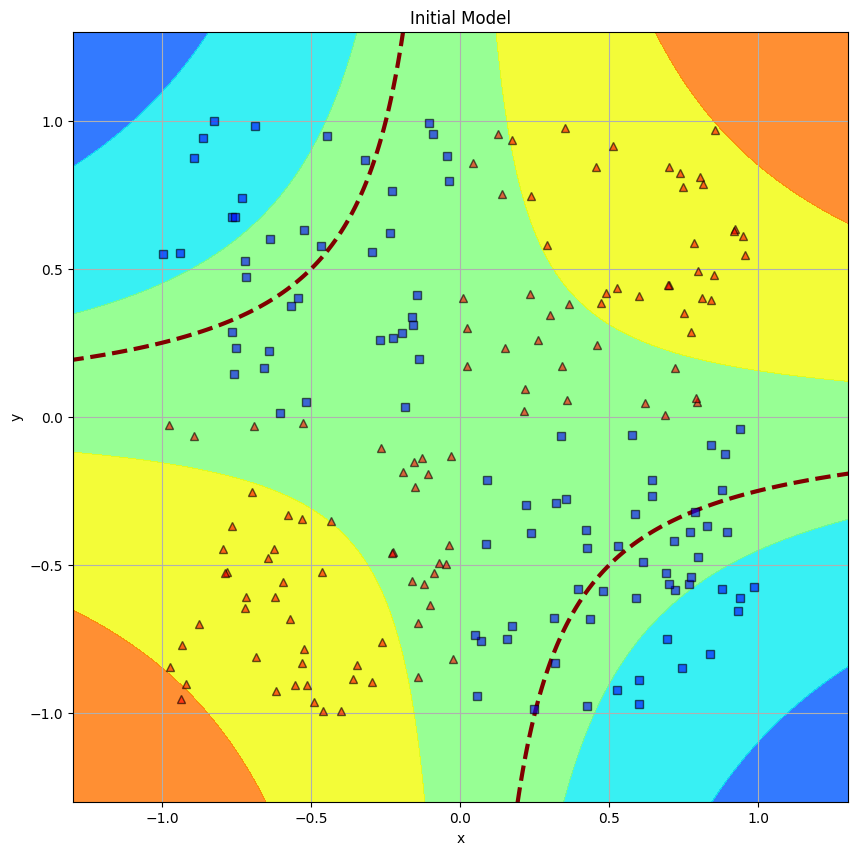

In [10]:
plot_model(model, lambda x, y: [x*y], 'Initial Model')

In [11]:
MaxEpochs = 170
lr = 0.01
optimizer = tf.keras.optimizers.Adam(lr)

np.random.seed(320)
shuffled_id = np.arange(0, len(features))
np.random.shuffle(shuffled_id)
shuffled_x_train = features[shuffled_id]
shuffled_y_train = labels[shuffled_id]

batch_size = 10
batch_loss = []

for epoch in range(MaxEpochs+1):

    if epoch % 40 == 0:
        curr_loss = loss(labels, model(features))
        print(model.w.numpy(), model.b.numpy(), curr_loss.numpy())

    for x_batch, y_batch in generate_batches(batch_size, shuffled_x_train, shuffled_y_train):
        with tf.GradientTape() as tape:
            curr_loss = loss(y_batch, model(x_batch))
            batch_loss.append(curr_loss)
            gradients = tape.gradient(curr_loss, model.trainable_variables)
            optimizer.apply_gradients(zip(gradients, model.trainable_variables))

[[1.]] [0.25] 0.57432944
[[6.48641]] [0.15494116] 0.27378407
[[10.152262]] [0.20445886] 0.20575966
[[13.445543]] [0.2478249] 0.16999401
[[16.715956]] [0.28662562] 0.14559336


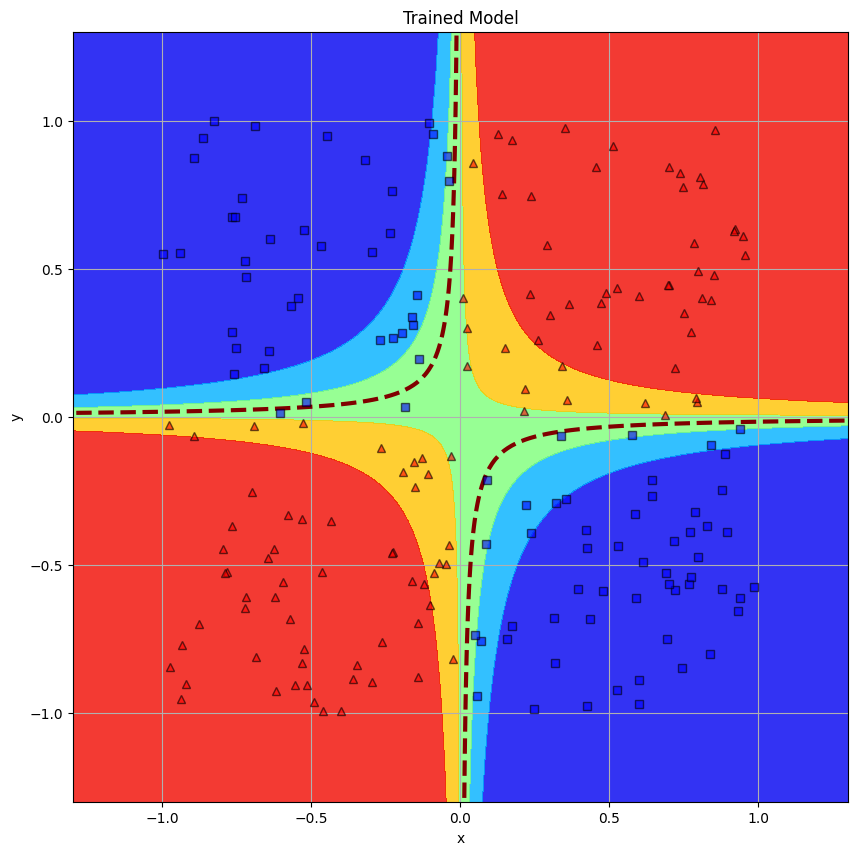

In [12]:
plot_model(model, lambda x, y: [x*y], 'Trained Model')

# 2. 불규칙 데이터

다음 데이터를 잘 분류하는 이항 분류 모델을 찾으시오.

In [13]:
from sklearn.datasets import make_blobs
# 불규칙 데이터 생성
xy, labels = make_blobs(n_samples=200, center_box=(-1,1), centers=6,cluster_std=0.1, random_state=20)
labels = labels % 2
labels = labels.reshape(-1,1)

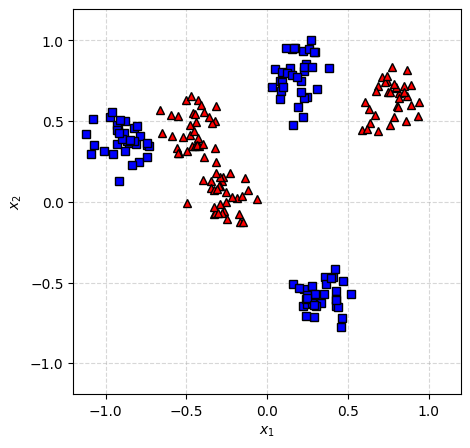

In [14]:
df = DataFrame(dict(x=xy[:,0], y=xy[:,1], label=labels.flatten()))
colors = {0:'red', 1:'blue'}
_, ax = plt.subplots(figsize=(5, 5))
grouped = df.groupby('label')
markers = {0:'bs', 1:'r^'}
for k, xy0 in df[['x', 'y']].iterrows():
    x0, y0 = xy0.values
    plt.plot(x0, y0, markers[labels[k][0]], mec='k')
plt.axis('equal')
plt.grid(linestyle='--', alpha=0.5)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
ax.set_xlim([-1.2, 1.2])
ax.set_ylim([-1.2, 1.2])
# plt.legend([0, 1])
plt.show()

In [15]:
features = np.array([[xval**3,xval**2,xval, yval] for xval, yval in xy])

In [16]:
class MyModel(tf.keras.Model):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.w = tf.Variable([[1.],[1.],[-1.],[1.]], dtype = float)
        self.b = tf.Variable([-0.25], dtype = float)

    def call(self,x):
        return tf.nn.sigmoid(tf.matmul(x, self.w) + self.b)

loss = lambda p, phat: tf.reduce_mean(-p*tf.math.log(phat)-(1-p)*tf.math.log(1-phat))

model = MyModel()

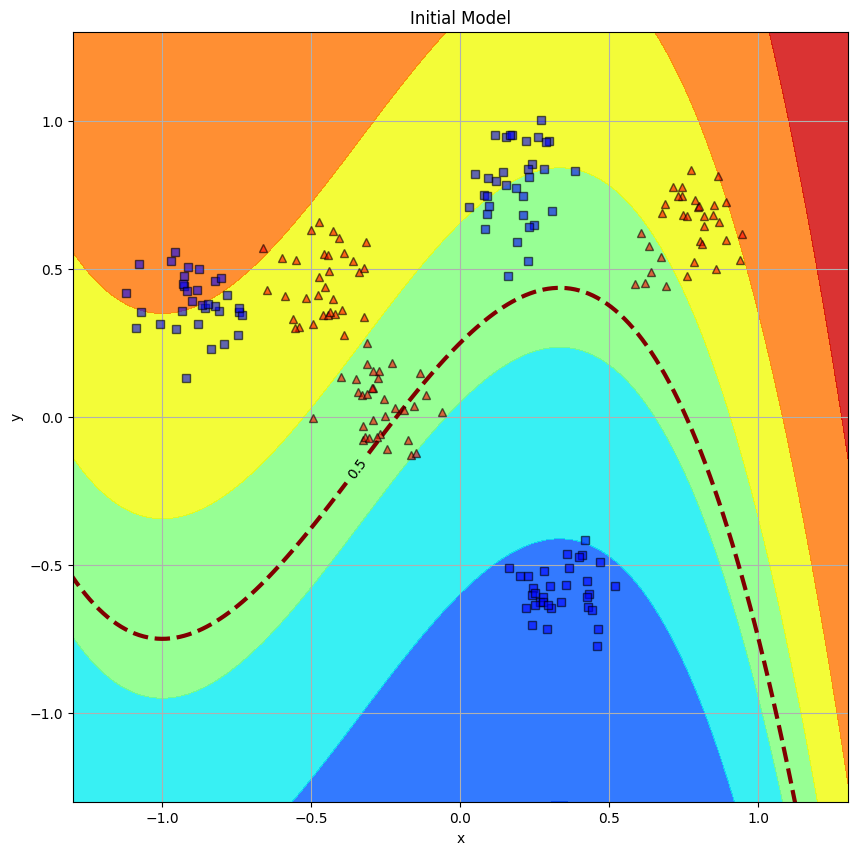

In [17]:
plot_model(model, lambda x, y: [x**3,x**2,x,y], 'Initial Model')

In [18]:
MaxEpochs = 280
lr = 0.01
optimizer = tf.keras.optimizers.Adam(lr)

np.random.seed(320)
shuffled_id = np.arange(0, len(features))
np.random.shuffle(shuffled_id)
shuffled_x_train = features[shuffled_id]
shuffled_y_train = labels[shuffled_id]

batch_size = 10
batch_loss = []

for epoch in range(MaxEpochs+1):

    if epoch % 56 == 0:
        curr_loss = loss(labels, model(features))
        print(model.w.numpy(), model.b.numpy(), curr_loss.numpy())

    for x_batch, y_batch in generate_batches(batch_size, shuffled_x_train, shuffled_y_train):
        with tf.GradientTape() as tape:
            curr_loss = loss(y_batch, model(x_batch))
            batch_loss.append(curr_loss)
            gradients = tape.gradient(curr_loss, model.trainable_variables)
            optimizer.apply_gradients(zip(gradients, model.trainable_variables))

[[ 1.]
 [ 1.]
 [-1.]
 [ 1.]] [-0.25] 0.6748714
[[ 7.8853087 ]
 [ 0.97957283]
 [-3.5437672 ]
 [ 0.5149045 ]] [-0.23346873] 0.3390454
[[13.830903  ]
 [ 1.9805934 ]
 [-6.241887  ]
 [ 0.30419034]] [-0.31258348] 0.21651039
[[19.04847   ]
 [ 2.902442  ]
 [-8.361166  ]
 [ 0.18039575]] [-0.38516793] 0.15216768
[[ 23.805765  ]
 [  3.764514  ]
 [-10.17054   ]
 [  0.09821026]] [-0.45025817] 0.11318721
[[ 28.219608  ]
 [  4.5766993 ]
 [-11.790786  ]
 [  0.03948736]] [-0.50941855] 0.08747078


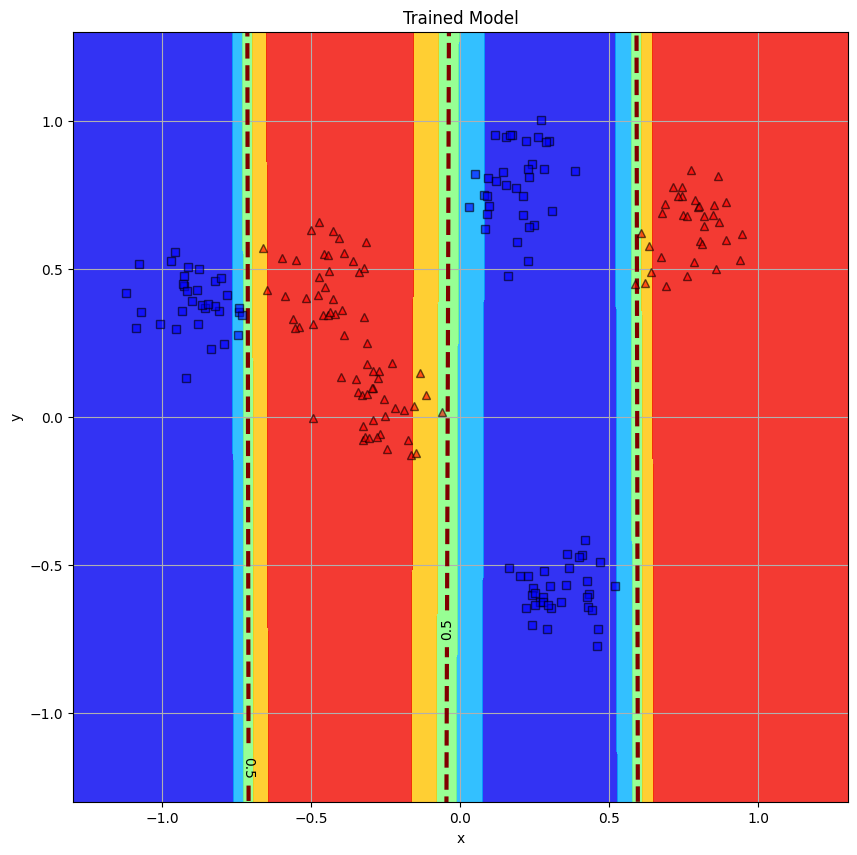

In [19]:
plot_model(model, lambda x, y: [x**3,x**2,x,y], 'Trained Model')